# Simple Linear Regression

For Simple Linear Regression, there is one independent variable which is used to predict the dependent variable.

In [26]:
#importing the libraries
import numpy as np #numerical python
import pandas as pd #python dataframe
import scipy.stats as sc # scientific python
import statsmodels.api as sm
import matplotlib.pyplot as plt

### In this problem, we are trying to predict the Revenue of a Hotel when we know how much the Hotel is occupied.

In [2]:
df = pd.read_csv('Hotel.csv')
df.head()

,PercentOccupancy,Revenueindollar1000
0,65.7,514.44
1,61.1,463.12
2,78.2,598.18
3,65.4,454.92
4,63.5,453.80


The $\textbf{Simple Linear Regression}$ is:

#### Revenueindollar1000 = $\beta_0$ +$\beta_1$* PercentOccupancy 

where $\beta_0$ and $\beta_1$ are the co-efficients

Before building the regression, let us see the scatterplot between the independent and dependent varaibles.

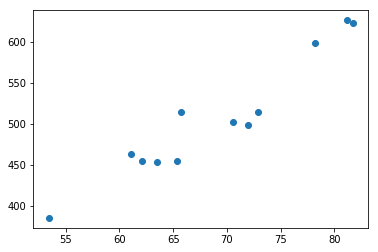

In [28]:
plt.scatter(df['PercentOccupancy'],df['Revenueindollar1000'])

From the above plot, we can see that there is some sort of linear relationship between the dependent and the independent variable.

Now, let us check the Pearson's Correlation Co-efficient.

Pearson's Correlation Co-efficient

In [12]:
df.corr()

,PercentOccupancy,Revenueindollar1000
PercentOccupancy,1.000000,0.958061
Revenueindollar1000,0.958061,1.000000


The Pearson's Correlation Co-efficient tells us that the variables indeed have a very strong linear relationship between them.

Now, let us go ahead and build the regression model. 

First, let us create two separate variables with the values of the dependent and the independent variables.

In [17]:
X=df['PercentOccupancy']
Y=df['Revenueindollar1000']

In [18]:
print(X.head())
print('--------------------')
print(Y.head())

0    65.7
1    61.1
2    78.2
3    65.4
4    63.5
Name: PercentOccupancy, dtype: float64
--------------------
0    514.44
1    463.12
2    598.18
3    454.92
4    453.80
Name: Revenueindollar1000, dtype: float64


In [19]:
# This adds the constant term beta0 to the Simple Linear Regression.

X=sm.add_constant(X)
X.head()

,const,PercentOccupancy
0,1.0,65.7
1,1.0,61.1
2,1.0,78.2
3,1.0,65.4
4,1.0,63.5


Now, using the statsmodels libray we are going to build the regression model and check the various statistical parameters.

In [20]:
model = sm.OLS(Y,X).fit()
model.summary()

C:\Users\gurubagi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Revenueindollar1000   R-squared:                       0.918
Model:                             OLS   Adj. R-squared:                  0.910
Method:                  Least Squares   F-statistic:                     111.8
Date:                 Sun, 16 Feb 2020   Prob (F-statistic):           9.52e-07
Time:                         06:19:11   Log-Likelihood:                -53.252
No. Observations:                   12   AIC:                             110.5
Df Residuals:                       10   BIC:                             111.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -60.3747     54.100     -1.116      0.291    -180.916      60.167
PercentOccupancy     8.2317      0.779     10.572      0.000       6.497       9.967
==============================================================================
Omnibus:                        1.318   Durbin-Watson:                   1.482
Prob(Omnibus):                  0.517   Jarque-Bera (JB):                0.765
Skew:                          -0.140   Prob(JB):                        0.682
Kurtosis:                       1.795   Cond. No.                         581.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The $\textbf{Simple Linear Regression}$ is:

#### Revenueindollar1000 = -60.3747 + 8.2317* PercentOccupancy 


Here, we notice that the p-value is very less which is in line with our algorithm. When we are using only variable for predicting, that particular variable has to be the most significant.

In [22]:
print('The variation in the dependent variable which is explained by the independent variable is','\n',
      model.rsquared*100,'%')

The variation in the dependent variable which is explained by the independent variable is 
 91.78813570805701 %


Now, let us go ahead and predict the independent variable using the model we have built.

In [23]:
ypred = model.predict(X)
print(ypred)

0     480.450779
1     442.584764
2     583.347559
3     477.981256
4     462.340946
5     520.786317
6     608.042787
7     532.310756
8     539.719325
9     612.158658
10    450.816506
11    379.200347
dtype: float64


After prediction, let us plot a graph to understand how good our model is and compare our model with the original values of the dependent variable.

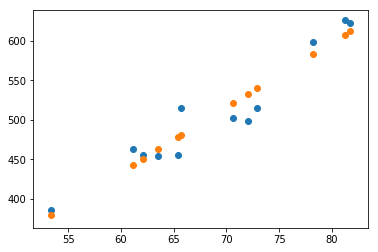

In [29]:
plt.scatter(df['PercentOccupancy'],df['Revenueindollar1000'])
plt.scatter(df['PercentOccupancy'],ypred)

Let us add the predicted values as a column to our original dataset.

In [30]:
df['Prediction'] = ypred
df.head()

,PercentOccupancy,Revenueindollar1000,Prediction
0,65.7,514.44,480.450779
1,61.1,463.12,442.584764
2,78.2,598.18,583.347559
3,65.4,454.92,477.981256
4,63.5,453.80,462.340946


In [31]:
df.corr()

,PercentOccupancy,Revenueindollar1000,Prediction
PercentOccupancy,1.000000,0.958061,1.000000
Revenueindollar1000,0.958061,1.000000,0.958061
Prediction,1.000000,0.958061,1.000000


In [32]:
#Computing Rsquared using the predicted and actual Target columns

0.958061**2

0.9178808797210001

Let us see the difference in the predicted values and the original given values.

In [23]:
#Residuals in the prediction

df['Revenueindollar1000'] - df['Prediction']

0     33.989221
1     20.535236
2     14.832441
3    -23.061256
4     -8.540946
5    -18.556317
6     18.217213
7    -33.610756
8    -25.259325
9     11.131342
10     3.953494
11     6.369653
dtype: float64

Here, we see that the actual values and the predicted values are quite close.